In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm


In [4]:
DATADIR = "Pose estimation Dataset"
CATEGORIES =os.listdir(DATADIR)
CATEGORIES

['.ipynb_checkpoints', 'Hello', 'Namaste', 'Raised Hands', 'T-Pose']

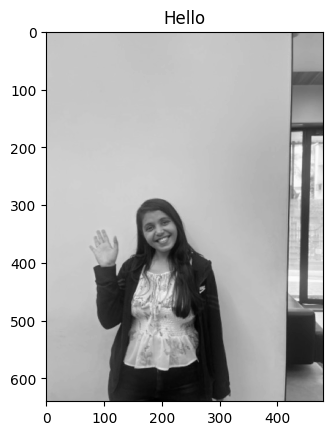

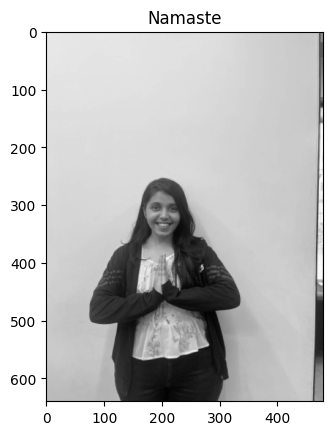

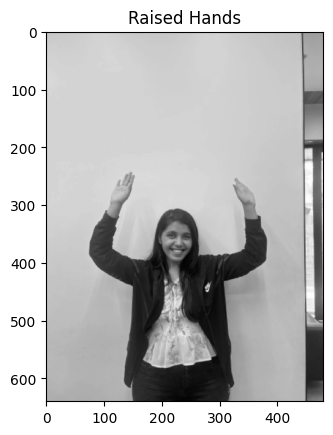

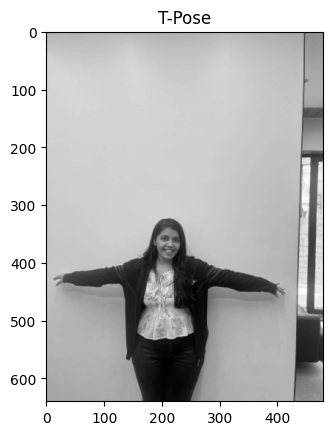

In [5]:
                                                            
for category in CATEGORIES:
    path = os.path.join(DATADIR, category)  # create path to category
    for img in os.listdir(path):  # iterate over each image per category
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)  # convert to array in grayscale
        if img_array is not None:
            plt.imshow(img_array, cmap='gray')  # display grayscale image
            plt.title(f'{category}')  # add title to indicate the category
            plt.show()  # display!


            break  # we just want one for now, so break to the next category

In [6]:
#Resizing images into fixed Size:
import cv2
import matplotlib.pyplot as plt
import os
from tqdm import tqdm

# Define constants and initialize training data
IMG_SIZE = 60
training_data = []

# Function to create training data
def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)

        for img in tqdm(os.listdir(path)):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                print(f"Error processing image {img}: {e}")
                pass

create_training_data()
print(len(training_data))


0it [00:00, ?it/s]
 20%|████████████████                                                                  | 10/51 [00:00<00:00, 42.76it/s]

Error processing image .ipynb_checkpoints: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'



 12%|█████████▊                                                                         | 6/51 [00:00<00:00, 47.67it/s]

Error processing image .ipynb_checkpoints: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'



100%|██████████████████████████████████████████████████████████████████████████████████| 51/51 [00:01<00:00, 29.88it/s]

200


In [7]:
# !pip install mediapipe
# !pip install opencv-python
import math
import cv2
from time import time
import mediapipe as mp
import matplotlib.pyplot as plt
# Initializing mediapipe pose class.
mp_pose = mp.solutions.pose

# Setting up the Pose function.
pose = mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.5, model_complexity=2)

# Initializing mediapipe drawing class, useful for annotation.
mp_drawing = mp.solutions.drawing_utils
image_path = 'Pose estimation Dataset/Raised Hands/IMG_2400 Medium.jpeg'
sample_img = cv2.imread(image_path)


Image shape: (640, 480, 3)
Image dtype: uint8


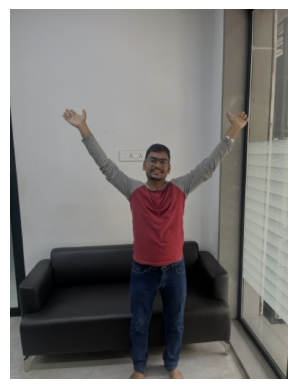

In [8]:
# Check if the image was loaded correctly
if sample_img is not None:
    print(f"Image shape: {sample_img.shape}")
    print(f"Image dtype: {sample_img.dtype}")
    # Convert the image from BGR to RGB
    sample_img_rgb = cv2.cvtColor(sample_img, cv2.COLOR_BGR2RGB)
    # Display the image
    plt.imshow(sample_img_rgb)
    plt.axis('off')  # Hide the axes
    plt.show()
else:
    print("Error: Image not loaded. Check the file path and format.")


In [16]:
# Perform pose detection after converting the image into RGB format.
results = pose.process(cv2.cvtColor(sample_img, cv2.COLOR_BGR2RGB))
# Check if any landmarks are found.
if results.pose_landmarks:

    # Iterates all 23 landmarks.
    for i in range(23):

        # Display the found normalized landmarks.
        print(f'{mp_pose.PoseLandmark(i).name}:\n{results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value]}')

NOSE:
x: 0.443567663
y: 0.516054809
z: -0.622057676
visibility: 0.999896526

LEFT_EYE_INNER:
x: 0.458839148
y: 0.497448772
z: -0.580004513
visibility: 0.999488354

LEFT_EYE:
x: 0.469063163
y: 0.497509539
z: -0.58069694
visibility: 0.999561846

LEFT_EYE_OUTER:
x: 0.478514582
y: 0.498164475
z: -0.580724597
visibility: 0.999461472

RIGHT_EYE_INNER:
x: 0.424829215
y: 0.499390185
z: -0.571300328
visibility: 0.99966073

RIGHT_EYE:
x: 0.415725678
y: 0.50045085
z: -0.57181716
visibility: 0.999803603

RIGHT_EYE_OUTER:
x: 0.404405773
y: 0.501699567
z: -0.572397828
visibility: 0.999751151

LEFT_EAR:
x: 0.49599117
y: 0.50595212
z: -0.322793067
visibility: 0.999803841

RIGHT_EAR:
x: 0.393989772
y: 0.510694742
z: -0.278797597
visibility: 0.999620557

MOUTH_LEFT:
x: 0.468023151
y: 0.537282765
z: -0.519897401
visibility: 0.999743879

MOUTH_RIGHT:
x: 0.422728688
y: 0.537378907
z: -0.510533214
visibility: 0.999660254

LEFT_SHOULDER:
x: 0.57615304
y: 0.612667143
z: -0.188308552
visibility: 0.999958634

R

In [9]:
import os
import cv2
import mediapipe as mp
import pandas as pd

# Initialize Mediapipe Pose class.
mp_pose = mp.solutions.pose
pose = mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.5, model_complexity=2)

# Initialize Mediapipe drawing class.
mp_drawing = mp.solutions.drawing_utils

# Directory containing the folders (classes)
base_dir = 'Pose estimation Dataset'

# Create a list to store data
data = []

# Loop through each class folder
for class_name in os.listdir(base_dir):
    class_folder = os.path.join(base_dir, class_name)

    # Ensure that we're only processing directories
    if os.path.isdir(class_folder):
        print(f"Processing class: {class_name}")

        # Loop through each image in the class folder
        for image_name in os.listdir(class_folder):
            image_path = os.path.join(class_folder, image_name)

            # Read and process the image
            image = cv2.imread(image_path)

            if image is not None:
                # Convert the image to RGB
                image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

                # Perform pose detection
                results = pose.process(image_rgb)

                if results.pose_landmarks:
                    # Extract the coordinates for landmarks 0 to 22
                    landmarks = results.pose_landmarks.landmark
                    row = {'Class': class_name}

                    for i in range(23):
                        landmark = landmarks[i]
                        row[f'X_{i}'] = landmark.x
                        row[f'Y_{i}'] = landmark.y
                        row[f'Z_{i}'] = landmark.z

                    # Add the data to the list
                    data.append(row)
                else:
                    print(f"No landmarks detected in image: {image_name}")
            else:
                print(f"Error reading image: {image_path}")

# Convert the list to a DataFrame
df = pd.DataFrame(data)

# Save the DataFrame to a CSV file
upper_landmarks = 'pose_landmarks.csv'
df.to_csv(upper_landmarks, index=False)




Processing class: .ipynb_checkpoints
Processing class: Hello


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


Processing class: Namaste
Processing class: Raised Hands
Error reading image: Pose estimation Dataset\Raised Hands\.ipynb_checkpoints
Processing class: T-Pose
Error reading image: Pose estimation Dataset\T-Pose\.ipynb_checkpoints


In [12]:
df.Class.unique()

array(['Hello', 'Namaste', 'Raised Hands', 'T-Pose'], dtype=object)